# Lab 2

Syftet med den här laborationen är att använda verktygen du lärt dig i Python för att implementera en
förenklad maskininlärningsalgoritm

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Du ska skapa en
algoritm som baserat på den givna datan kunna avgöra om en ny datapunkt ska klassificeras som Pichu
eller Pikachu.

# Uppgifter
Gör dessa uppgifter när du klassificerat testdatan korrekt.
- Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen
som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.
- Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive
klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass
testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.

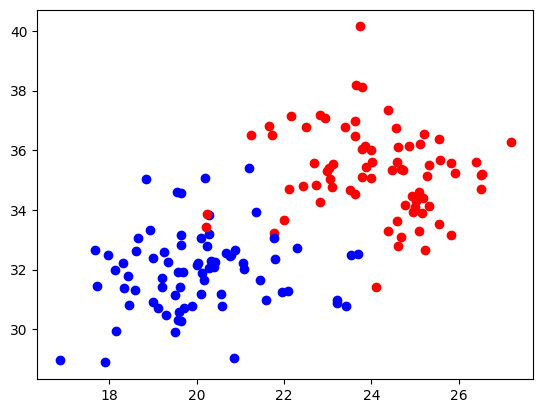

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu
Sample with (width, height): (43.0, 22.0) classified as Pikachu
Sample with (width, height): (43.0, 22.0) classified as Pikachu by majority


In [31]:
import matplotlib.pyplot as plt
import math
# Load datapoints
datapoints = []										                # datapoints list [width,height,label]
klass=['Pichu','Pikachu']								            # label (0-pichu, 1-pikachu))
with open('./datapoints.txt') as f:
	line0 = f.readline()								            # remove header
	for line in f:
		row = line.split(',')							            # split width,heigth,label
		datapoints.append([float(row[0]),float(row[1]),klass[int(row[2])]])		# append datapoints

# Draw points
colors = ['blue','red']									            # 'blue'-Pichu ,'red'-Pikachu
for datapoint in datapoints:
	plt.plot(datapoint[0],datapoint[1],'o',color=colors[klass.index(datapoint[2])])		#draw point with specific color
plt.show(block=False)
	
# Load testpoints
testpoints = []
with open('./testpoints.txt') as f:
	line0 = f.readline()								            # ignore first line
	for line in f:
		row = line.split('. ')[1]						            # keep only data
		row = row.replace('(','')						            # remove '('
		row = row.replace(')','')						            # remove ')'
		row = row.split(',')							            # split width,heigth
		testpoints.append([float(row[0]),float(row[1])])			# append testpoints
		
def pythagora(b,c):													# calculate hypotenusa
	x0,y0 = b
	x1,y1 = c
	return math.sqrt((x0-x1)**2+(y0-y1)**2)
def label(point,data):												# return label from nearest datapoint
	short = pythagora(point,[data[0][0],data[0][1]])					# initiate short with first distance
	typ = data[0][2]												# initiate typ with first datapoint label
	for datapoint in data:											# iterate each datapoint
		dist = pythagora(point, [datapoint[0],datapoint[1]])			# calculate distance for each testpoint
		if dist < short:											# short take new value if is nearest
			short = dist											# typ take label from nearest	
			typ = datapoint[2]
	return typ							

# Label for testpoint
for testpoint in testpoints:
	print('Sample with (width, height): ('+str(testpoint[0])+', '+ str(testpoint[1])+') classified as ' + label(testpoint,datapoints))
	
def input_testpoint():
	while True:
		try:														# handel error
			x = float(input('Input width:'))
			if x < 0:
				raise ValueError
			y = float(input('Input height:'))
			if y < 0:
				raise ValueError
			return (x,y)
		except ValueError:
			print('Enter only positive numbers!')
		except KeyboardInterrupt:
			print('Finnish!')
			exit()
		
width,height = input_testpoint()	
print('Sample with (width, height): ('+str(width)+', '+ str(height)+') classified as ' + label([width,height],datapoints))

def majority(point,data):
	all_distance = []							# all distance
	for datapoint in data:
		all_distance.append([pythagora(point,[datapoint[0],datapoint[1]]),datapoint[2]])	#append distance and associate label
	sorted_distance = sorted(all_distance)		# sorted distance
	d0=0;d1=0;n0=0;n1=0;				        # initiate n-voting numbers, d-total distance to voters
	for distance in sorted_distance[:10]:		#iterate first 10 closest
		if distance[1] == 'Pikachu':		    # check label for voters
			d1 += distance[0]					# calculate total distance (if equality)
			n1 +=1								# increment voters number for Pikachu
		else:
			d0 += distance[0]		
			n0 +=1
	if n0 > n1:									# many Pichu voters?
		return 'Pichu'
	elif n0 < n1:
		return 'Pikachu'
	else:						    			# equality voters numbers
		if d0 < d1:								# closest Pichu voters?
			return 'Pichu'
		elif d0 > d1:
			return 'Pikachu'
		else:									# same numbers, same distance - can't decide
			return 'undefined'			

print('Sample with (width, height): ('+str(width)+', '+ str(height)+') classified as ' + majority([width,height],datapoints) + ' by majority')

